In [58]:
import off_label
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
"""Analysis of Patient Information.
This script does not calculate off-label drug prescription, but rather analyzes the patients."""

In [49]:
# Returning the list of all patient IDs that have been given a certain drug
patients = off_label.patient_list('Gabapentin').reset_index()

In [50]:
# Returning the patient's information who have been given the drug
information = off_label.patient_details(patients.subject_id.values)
information.head()

,index,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag,duration
0,65,15772648,20829310,2145-09-01 19:50:00,2145-09-04 14:35:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,b'Medicare',ENGLISH,SINGLE,WHITE,NaN,NaN,0,2 days 18:45:00
1,132,11309329,25435133,2128-11-27 18:41:00,2128-11-27 21:50:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,b'Other',ENGLISH,MARRIED,WHITE,2128-11-27 13:38:00,2128-11-27 21:50:00,0,0 days 03:09:00
2,162,13117765,23971962,2181-10-14 19:27:00,2181-10-17 15:58:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,b'Medicare',?,DIVORCED,OTHER,2181-10-14 17:30:00,2181-10-14 21:11:00,0,2 days 20:31:00
3,1891,13769888,22705127,2151-01-01 12:30:00,2151-01-03 14:50:00,NaN,EW EMER.,PACU,HOME,b'Medicare',ENGLISH,SINGLE,WHITE,NaN,NaN,0,2 days 02:20:00
4,7210,14273762,21475267,2160-12-18 07:15:00,2160-12-20 14:30:00,NaN,DIRECT OBSERVATION,PACU,NaN,b'Medicare',ENGLISH,MARRIED,OTHER,NaN,NaN,0,2 days 07:15:00


In [53]:
information.dtypes

index                             int64
subject_id                        int64
hadm_id                           int64
admittime                datetime64[ns]
dischtime                datetime64[ns]
deathtime                        object
admission_type                   object
admission_location               object
discharge_location               object
insurance                        object
language                         object
marital_status                   object
ethnicity                        object
edregtime                        object
edouttime                        object
hospital_expire_flag              int64
duration                timedelta64[ns]
dtype: object

In [52]:
#test2 = gab.decode("utf-8")
information['insurance'] = information['insurance'].str.decode('utf-8')

Text(0, 0.5, '')

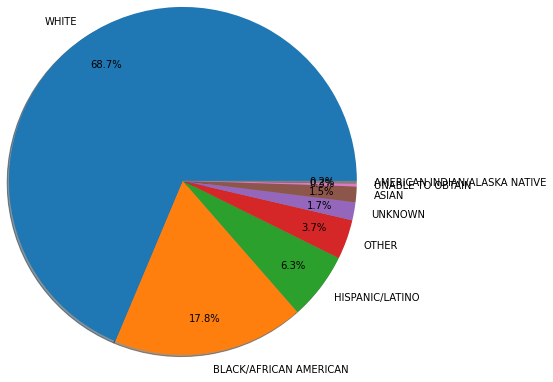

In [85]:
exp = information['ethnicity'].value_counts()
exp.plot.pie(autopct='%1.1f%%',shadow=True, radius=2, labeldistance = 1.1, pctdistance = 0.8)
#plt.legend(information['ethnicity'], loc = 'upper right')
#.plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('')

In [ ]:
## WILL NOT BE DOING MORE ANALYSIS UNTIL WE HAVE MORE RESULTS

<AxesSubplot:ylabel='insurance'>

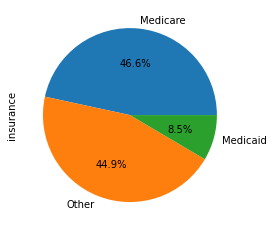

In [55]:
gab.loc[gab['ethnicity'] == "WHITE", 'insurance'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

<AxesSubplot:ylabel='insurance'>

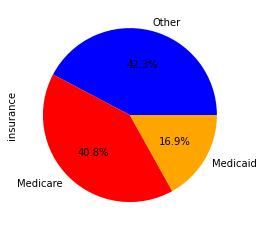

In [38]:
colors={'Medicare':'red', 
        'Medicaid':'orange', 'Other': 'blue'}
test = gab.loc[gab['ethnicity'] == "BLACK/AFRICAN AMERICAN", 'insurance'].value_counts()
test.plot.bar(autopct='%1.1f%%', colors=[colors[v] for v in test.keys()])

In [44]:
from pandas.api.types import CategoricalDtype
types = gab.insurance.tolist()

#topbrandprice = dataset.loc[(dataset['brand'].isin(bestbrands))][['brand', 'price']]#.sort_values('price($)', ascending=False)

brand_cat = CategoricalDtype(categories = types, ordered = True)
#topbrandprice['brand'] = topbrandprice['brand'].astype(brand_cat)
gab['insurance'] = gab['insurance'].astype(brand_cat)
test4 = gab.loc[gab['ethnicity'] == "WHITE", 'insurance'].value_counts()
test4.plot.bar(colors=[colors[v] for v in test4.keys()])

ValueError: Categorical categories must be unique

In [21]:
type(test.keys()[0])

str